<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-准备训练数据和预测数据" data-toc-modified-id="1-准备训练数据和预测数据-1">1 准备训练数据和预测数据</a></span><ul class="toc-item"><li><span><a href="#1.1-加载数据源" data-toc-modified-id="1.1-加载数据源-1.1">1.1 加载数据源</a></span></li><li><span><a href="#1.2-查看时间序列概况" data-toc-modified-id="1.2-查看时间序列概况-1.2">1.2 查看时间序列概况</a></span></li><li><span><a href="#1.3-重采样" data-toc-modified-id="1.3-重采样-1.3">1.3 重采样</a></span><ul class="toc-item"><li><span><a href="#1.3.1-可视化重采样后的数据趋势图" data-toc-modified-id="1.3.1-可视化重采样后的数据趋势图-1.3.1">1.3.1 可视化重采样后的数据趋势图</a></span></li></ul></li><li><span><a href="#1.4-构建未来3个月时间序列" data-toc-modified-id="1.4-构建未来3个月时间序列-1.4">1.4 构建未来3个月时间序列</a></span><ul class="toc-item"><li><span><a href="#1.4.1-方法1：循环统计未来每个月的天数，以便找到每个月的最后-一天" data-toc-modified-id="1.4.1-方法1：循环统计未来每个月的天数，以便找到每个月的最后-一天-1.4.1">1.4.1 方法1：循环统计未来每个月的天数，以便找到每个月的最后 一天</a></span></li><li><span><a href="#1.4.2-方法2：timedelta-与-date_range()结合按月生成时间序列" data-toc-modified-id="1.4.2-方法2：timedelta-与-date_range()结合按月生成时间序列-1.4.2">1.4.2 方法2：timedelta 与 date_range()结合按月生成时间序列</a></span></li></ul></li></ul></li><li><span><a href="#2-ARMA预测" data-toc-modified-id="2-ARMA预测-2">2 ARMA预测</a></span><ul class="toc-item"><li><span><a href="#2.1-什么是AIC？" data-toc-modified-id="2.1-什么是AIC？-2.1">2.1 什么是AIC？</a></span></li><li><span><a href="#2.2-设置p-q阶参数范围" data-toc-modified-id="2.2-设置p-q阶参数范围-2.2">2.2 设置p q阶参数范围</a></span></li><li><span><a href="#2.3-循环建模寻找最佳参数模型" data-toc-modified-id="2.3-循环建模寻找最佳参数模型-2.3">2.3 循环建模寻找最佳参数模型</a></span></li><li><span><a href="#2.4-预测并可视化" data-toc-modified-id="2.4-预测并可视化-2.4">2.4 预测并可视化</a></span><ul class="toc-item"><li><span><a href="#2.4.1-进行预测" data-toc-modified-id="2.4.1-进行预测-2.4.1">2.4.1 进行预测</a></span></li><li><span><a href="#2.4.2--可视化预测结果" data-toc-modified-id="2.4.2--可视化预测结果-2.4.2">2.4.2  可视化预测结果</a></span></li></ul></li></ul></li><li><span><a href="#3-ARIMA预测" data-toc-modified-id="3-ARIMA预测-3">3 ARIMA预测</a></span><ul class="toc-item"><li><span><a href="#3.1-设置pdq参数范围" data-toc-modified-id="3.1-设置pdq参数范围-3.1">3.1 设置pdq参数范围</a></span></li><li><span><a href="#3.2-循环建模训练，寻找最佳参数和模型" data-toc-modified-id="3.2-循环建模训练，寻找最佳参数和模型-3.2">3.2 循环建模训练，寻找最佳参数和模型</a></span></li><li><span><a href="#3.3-预测并可视化" data-toc-modified-id="3.3-预测并可视化-3.3">3.3 预测并可视化</a></span><ul class="toc-item"><li><span><a href="#3.3.1-预测" data-toc-modified-id="3.3.1-预测-3.3.1">3.3.1 预测</a></span></li><li><span><a href="#3.3.2-可视化预测结果" data-toc-modified-id="3.3.2-可视化预测结果-3.3.2">3.3.2 可视化预测结果</a></span></li></ul></li></ul></li></ul></div>

股票价格预测    
任何股票价格预测，比如 美吉姆    
http://quotes.money.163.com/trade/lsjysj_002621.html    
历史数据（从1990年12月19日至今）    
请你编写代码对该股票未来3个月的变化进行预测（可以按照月来统计，也可以按照天）    
模型选择：ARMA/ARIMA/LSTM 中的任意一种    

In [1]:
import warnings


# 指定忽略警告消息
warnings.filterwarnings("ignore") 

In [2]:
import calendar

In [3]:
from itertools import product 

In [4]:
from datetime import datetime, timedelta

In [5]:
import pandas as pd

In [6]:
from pandas_datareader.data import DataReader

In [7]:
from statsmodels.api import tsa
# from statsmodels.tsa.arima_model import ARMA

In [8]:
from matplotlib import pyplot as plt

In [9]:
# dir(tsa)

# 1 准备训练数据和预测数据

## 1.1 加载数据源

In [10]:
# 深圳股票 美吉姆 '002621.SZ'
df = DataReader(name='002621.SZ', data_source="yahoo", start='12/19/1990')

In [11]:
df.shape

(2196, 6)

In [12]:
df.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-09-29,4.38329,3.98766,4.17937,4.19680,66114972.0,3.956766
2011-09-30,4.14800,3.84300,4.02600,3.95454,30721099.0,3.728362


分别是：日期、最高价、最低价、开盘价、收盘价、成交量、复权收盘价

In [13]:
# 检查是否有空值
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2011-09-29 to 2020-10-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2196 non-null   float64
 1   Low        2196 non-null   float64
 2   Open       2196 non-null   float64
 3   Close      2196 non-null   float64
 4   Volume     2196 non-null   float64
 5   Adj Close  2196 non-null   float64
dtypes: float64(6)
memory usage: 120.1 KB


In [15]:
df.index

DatetimeIndex(['2011-09-29', '2011-09-30', '2011-10-10', '2011-10-11',
               '2011-10-12', '2011-10-13', '2011-10-14', '2011-10-17',
               '2011-10-18', '2011-10-19',
               ...
               '2020-09-29', '2020-09-30', '2020-10-09', '2020-10-12',
               '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16',
               '2020-10-19', '2020-10-20'],
              dtype='datetime64[ns]', name='Date', length=2196, freq=None)

## 1.2 查看时间序列概况

In [16]:
# 对最高价进行季节分解 period=250  freq=12
result  = tsa.seasonal_decompose(x=df['High'], model='additive', period=250)

In [17]:
type(result)

statsmodels.tsa.seasonal.DecomposeResult

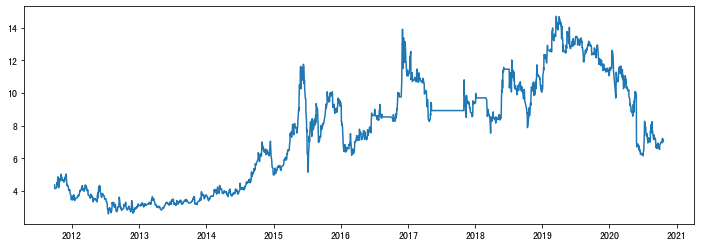

In [18]:
# 真实数据
plt.figure(figsize=(12, 4))
plt.plot(df['High'])
plt.show()

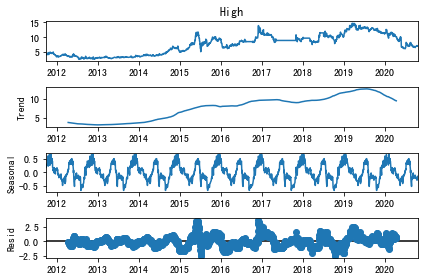

In [19]:
result.plot()
plt.show()

第一个小图就是我们观测到的实际值，和最初我们用简单画出来的图像其实是一样的，只是更扁平了;     
下面第二个图Trend可以看到它整体的变化趋势, 该数据集呈上升后略回落趋势;     
第三个seasonal是整个序列表现出来的季节性部分;    
第四个residual是残差。

## 1.3 重采样

In [20]:
# 'M'按每月最后一天重采样
df_month = df.resample('M').mean()
df_month.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-09-30,4.265645,3.91533,4.102685,4.075670,4.841804e+07,3.842564
2011-10-31,4.559099,4.25290,4.355728,4.421195,3.119109e+07,4.168326


In [21]:
df_month.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-30,6.873636,6.641818,6.767273,6.738182,3.360482e+06,6.738182
2020-10-31,7.093750,6.827500,6.961250,6.960000,3.937226e+06,6.960000


In [22]:
df_q =  df.resample("Q").mean()
df_q.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-09-30,4.265645,3.915330,4.102685,4.075670,4.841804e+07,3.842564
2011-12-31,4.463953,4.249522,4.342824,4.356476,1.835606e+07,4.107309


In [23]:
df_year = df.resample("Y").mean()
df_year.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-12-31,4.457556,4.238742,4.335077,4.347418,1.932580e+07,4.098769
2012-12-31,3.397564,3.258968,3.326509,3.331720,9.302570e+06,3.183964


### 1.3.1 可视化重采样后的数据趋势图

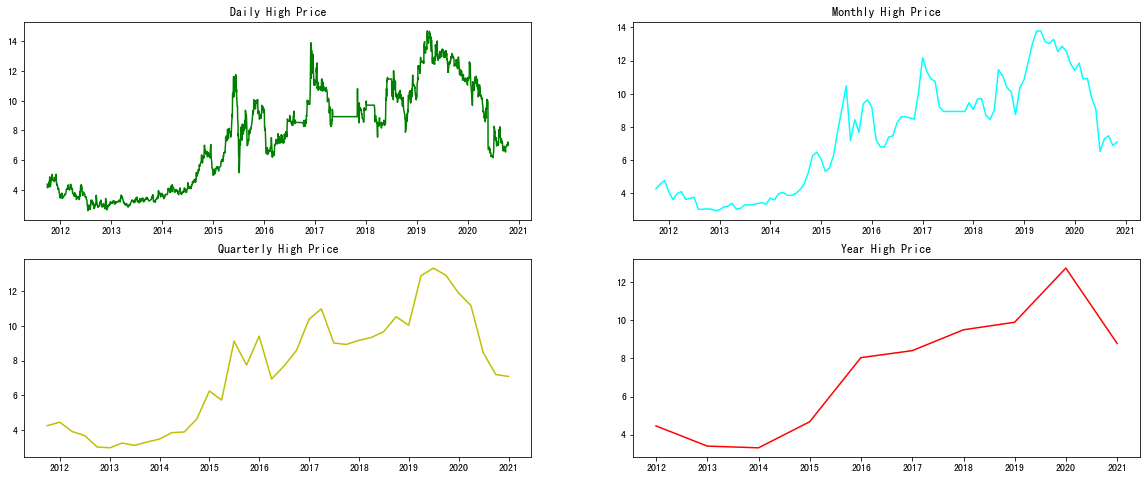

In [24]:

fig, axes = plt.subplots(2, 2, figsize=(20, 8))

axes[0, 0].plot(df['High'], color='g')
axes[0, 1].plot(df_month['High'], color='cyan')
axes[1, 0].plot(df_q['High'], color='y')
axes[1, 1].plot(df_year['High'], color='r')

titles = [
    "%s High Price" % t for t in ['Daily', 'Monthly', 'Quarterly', 'Year']
]

n = 0
for i in range(2):
    for j in range(2):
        axes[i, j].set_title("%s" % titles[n])
        n += 1
plt.show()

## 1.4 构建未来3个月时间序列

### 1.4.1 方法1：循环统计未来每个月的天数，以便找到每个月的最后 一天

In [25]:
future_month = 3
last_month = df_month.index[-1]
last_month

Timestamp('2020-10-31 00:00:00', freq='M')

In [26]:
date_list = []
# 12月时，年+1，月重置为1月，其他时候年不变，月+1
for i in range(future_month):
    year = last_month.year
    month = last_month.month
    if last_month.month == 12:
        month = 1
        year += 1
    else:
        month += 1
    # 计算下个月有多少天    
    n = calendar.monthrange(year, month)[1]
    # 生成下个月最后一天的日期
    last_month += timedelta(days=n)
    date_list.append(last_month)

In [27]:
last_month

Timestamp('2021-01-31 00:00:00', freq='M')

In [28]:
future = pd.DataFrame(index=date_list, columns=['High'])
future

,High
2020-11-30,NaN
2020-12-31,NaN
2021-01-31,NaN


In [29]:
# 与原df拼接
future = pd.concat((df_month[['High']], future), axis=0)
future.shape

(113, 1)

In [30]:
future.index

DatetimeIndex(['2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30',
               ...
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31'],
              dtype='datetime64[ns]', length=113, freq=None)

### 1.4.2 方法2：timedelta 与 date_range()结合按月生成时间序列
未来月份中包含2月时，3个月天数最少和为90，不包含2月时，3个月天数之和为92天。因此直接另last_month + 92天，使用date_range函数，生成日期序列时，当freq为M时，不足一个月的日期将会被舍弃。

In [31]:
# 原数据中有多少个月
m = df_month.shape[0]
last_month = df_month.index[-1]
last_month

Timestamp('2020-10-31 00:00:00', freq='M')

In [32]:
last_month += timedelta(92)
last_month

Timestamp('2021-01-31 00:00:00', freq='M')

In [33]:
# 按月最后一天生成日期序列，当end日期不足一个月时，将会被舍弃
new_index = pd.date_range(df_month.index[0], end=last_month, freq='M')

In [34]:
new_index

DatetimeIndex(['2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30',
               ...
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31'],
              dtype='datetime64[ns]', length=113, freq='M')

In [35]:
len(new_index) - m

3

In [36]:
future = pd.DataFrame(index=new_index[-3:], columns=['High'])
future

,High
2020-11-30,NaN
2020-12-31,NaN
2021-01-31,NaN


In [37]:
future = pd.concat((df_month[['High']], future), axis=0)

In [38]:
future.head(1)

,High
2011-09-30,4.265645


In [39]:
future.tail(1)

,High
2021-01-31,NaN


# 2 ARMA预测

从上图的Trend图来看，数据集存在趋势，因此应该是不平稳的序列，ARMA要求时序数据是稳定的，判断预测效果会受影响

## 2.1 什么是AIC？

赤池信息量 （akaike information criterion）    

$AIC = \frac{2(k - ln(L))}{n}  $     
 
k是所拟合模型中参数的数量， L 是该模型下的最大似然,  n是观测值数目。     

AIC的大小取决于L和k。k取值越小，AIC越小；L取值越大，AIC值越小。    

k小意味着模型简洁，L大意味着模型精确。因此AIC和修正的决定系数类似，在评价模型是兼顾了简洁性和精确性。


## 2.2 设置p q阶参数范围

In [40]:
# 设置p q阶的范围为0、1、2的整数，笛卡尔积
params = product(range(3),  range(3))

## 2.3 循环建模寻找最佳参数模型

In [41]:
result = []
min_aic = float('inf')
for param in params:
    try:
        arma = tsa.ARMA(df_month['High'], order=param).fit()
        result.append([param, arma.aic])
    except ValueError:
        print("参数错误:", param)
        continue
    if arma.aic < min_aic:
        min_aic = arma.aic
        best_model = arma
        best_param = param
    
    
print("最优模型为:", best_model.summary())

最优模型为:                               ARMA Model Results                              
Dep. Variable:                   High   No. Observations:                  110
Model:                     ARMA(1, 0)   Log Likelihood                -133.607
Method:                       css-mle   S.D. of innovations              0.805
Date:                Tue, 20 Oct 2020   AIC                            273.214
Time:                        12:10:28   BIC                            281.315
Sample:                    09-30-2011   HQIC                           276.500
                         - 10-31-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8887      1.806      3.814      0.000       3.349      10.429
ar.L1.High     0.9649      0.021     45.192      0.000       0.923       1.007
                                    Roots    

In [42]:
min_aic, best_param

(273.2136334499906, (1, 0))

## 2.4 预测并可视化

### 2.4.1 进行预测

In [43]:
future['ARMA_pred'] = best_model.predict(start=0,  end=future.shape[0])

In [44]:
future

,High,ARMA_pred
2011-09-30,4.265645,6.888748
2011-10-31,4.559099,4.357599
2011-11-30,4.762676,4.640766
2011-12-31,4.096032,4.837206
2012-01-31,3.607483,4.193932
...,...,...
2020-09-30,6.873636,7.443191
2020-10-31,7.093750,6.874166
2020-11-30,NaN,7.086564
2020-12-31,NaN,7.079629


### 2.4.2  可视化预测结果

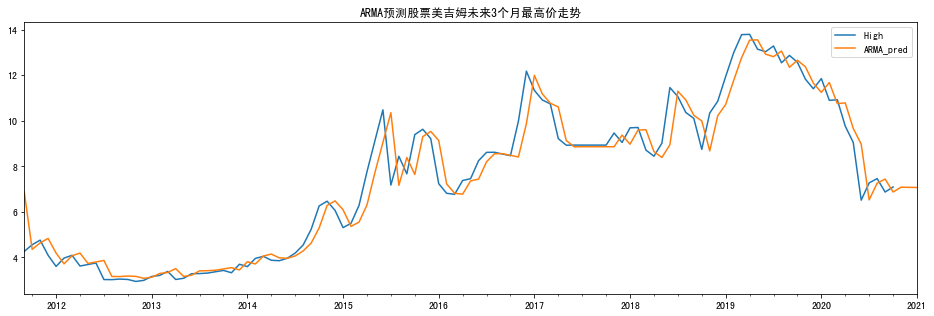

In [45]:
future.plot(figsize=(16, 5), title="ARMA预测股票美吉姆未来3个月最高价走势")
plt.show()

# 3 ARIMA预测
---

```tsa.ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')```    
Autoregressive Integrated Moving Average ARIMA(p,d,q) Model


```
statsmodels.tsa.statespace.sarimax.SARIMAX(endog, exog=None, order=1, 0, 0, seasonal_order=0, 0, 0, 0, trend=None, measurement_error=False, time_varying_regression=False, mle_regression=True, simple_differencing=False, enforce_stationarity=True, enforce_invertibility=True, hamilton_representation=False, concentrate_scale=False, trend_offset=1, use_exact_diffuse=False, dates=None, freq=None, missing='none', validate_specification=True, **kwargs)
```    

具有外生回归模型的季节性自回归综合移动平均线     

## 3.1 设置pdq参数范围

In [46]:
params = product(range(0, 4), range(1, 5), range(3))

## 3.2 循环建模训练，寻找最佳参数和模型

In [47]:
result = []
best_aic = float('inf')
for param in params:
    try:
#         arima = tsa.ARIMA(df_month['High'], order=param).fit()
        arima = tsa.statespace.SARIMAX(df_month['High'], order=param).fit()
    except Exception:
#         print("参数错误:", param)
        continue
    aic = arima.aic
    result.append((param, aic))
    if aic < best_aic:
        best_aic = aic
        best_model2 = arima
        best_param2 = param
print(f"best model:{best_model2.summary()}")

best model:                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                  110
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -125.628
Date:                Tue, 20 Oct 2020   AIC                            263.255
Time:                        12:10:34   BIC                            279.403
Sample:                    09-30-2011   HQIC                           269.804
                         - 10-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9488      0.122      7.767      0.000       0.709       1.188
ar.L2         -0.8279      0.139     -5.957      0.000      -1.100      -0.556
ar.L3         -0.1235      0.100     -1.2

In [48]:
f"ARMA的AIC:{min_aic:8.2f}, ARIMA的AIC:{best_aic:8.2f}"

'ARMA的AIC:  273.21, ARIMA的AIC:  263.26'

可见，对于有趋势的该数据集，差分自回归滑动平均模型ARIMA确实比自回归滑动平均模型ARMA要精确。

## 3.3 预测并可视化

### 3.3.1 预测

In [49]:
future.head(1)

,High,ARMA_pred
2011-09-30,4.265645,6.888748


In [50]:
future.shape[0]

113

In [52]:
future['ARIMA_pred'] = best_model2.predict(start=0, end=future.shape[0])
future.head(1)

,High,ARMA_pred,ARIMA_pred
2011-09-30,4.265645,6.888748,0.0


### 3.3.2 可视化预测结果

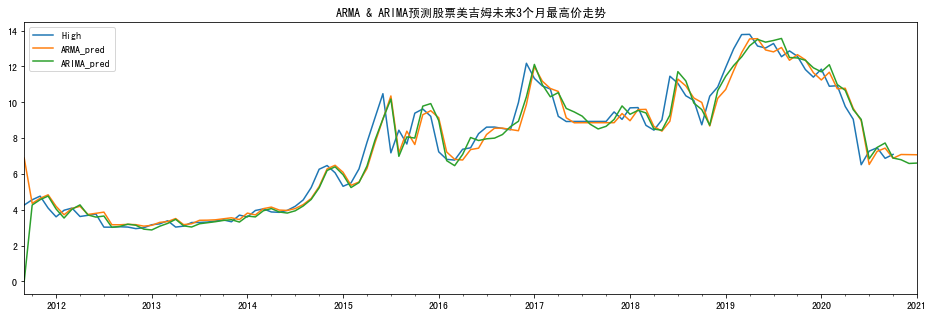

In [54]:
future.plot(figsize=(16, 5), title="ARMA & ARIMA预测股票美吉姆未来3个月最高价走势")
plt.show()